In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
from tensorflow.keras.datasets import fashion_mnist

In [8]:
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size= 0.2, random_state= 42)

In [9]:
print(train_scaled.shape)

(48000, 28, 28, 1)


In [11]:
model = keras.Sequential()

# First Convolution Layer
model.add(keras.layers.Conv2D(32, kernel_size=3, activation= 'relu', padding= 'same', input_shape= (28,28,1)))
# same padding 적용 => input shape = feature map shape

model.add(keras.layers.MaxPool2D(2))
# (2,2) pooling 적용 => feature map shape = (14, 14, 32)

# Second Convolution Layer
model.add(keras.layers.Conv2D(64, kernel_size= 3, activation= 'relu', padding= 'same'))
# same padding 적용 => input shape = feature map shape (14, 14, 64)

model.add(keras.layers.MaxPooling2D(2))
# (2,2) pooling 적용 => feature map shape = (7, 7, 64)

# Flatten Layer
model.add(keras.layers.Flatten())

# Hidden Dense Layer
model.add(keras.layers.Dense(100, activation= 'relu'))

# Dropout Layer
model.add(keras.layers.Dropout(0.4))

# Output Layer
model.add(keras.layers.Dense(10, activation= 'softmax'))

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

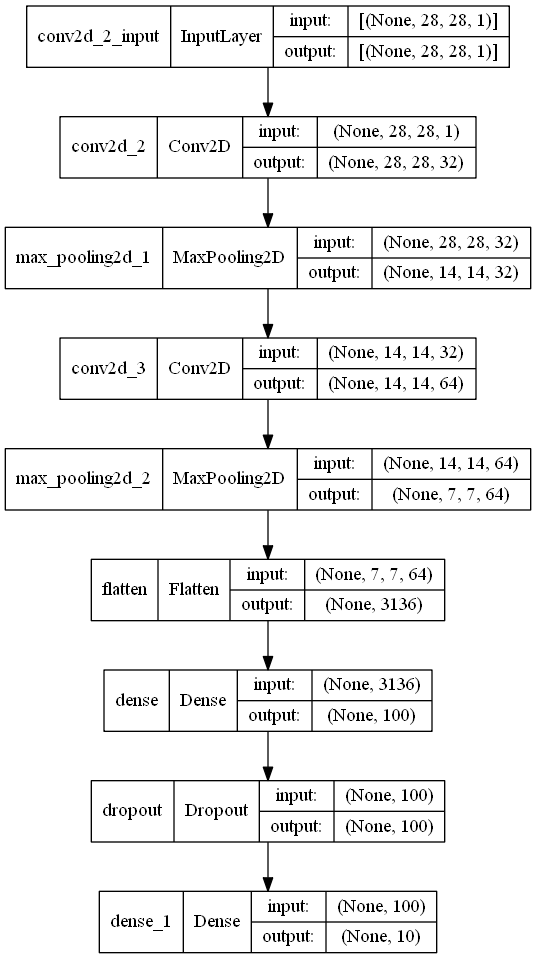

In [14]:
keras.utils.plot_model(model, show_shapes= True, to_file='Ch8-2.png')

In [16]:
model.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics= 'accuracy'
)

In [17]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'best_CNN_model.h5',
    save_best_only= True
)

early_stopping_cb = keras.callbacks.EarlyStopping(
    patience= 2,
    restore_best_weights= True
)

In [18]:
with tf.device('/gpu:0'):
    history= model.fit(
        train_scaled, train_target,
        epochs= 20,
        verbose= 1,
        validation_data= (val_scaled, val_target),
        callbacks= ([checkpoint_cb, early_stopping_cb])
    )

Epoch 1/20
1500/1500 [==============================] - 11s 4ms/step - loss: 0.4986 - accuracy: 0.8225 - val_loss: 0.3284 - val_accuracy: 0.8775
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3362 - accuracy: 0.8796 - val_loss: 0.2885 - val_accuracy: 0.8909
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2873 - accuracy: 0.8950 - val_loss: 0.2689 - val_accuracy: 0.8992
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2570 - accuracy: 0.9065 - val_loss: 0.2409 - val_accuracy: 0.9086
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2329 - accuracy: 0.9145 - val_loss: 0.2330 - val_accuracy: 0.9172
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2139 - accuracy: 0.9203 - val_loss: 0.2321 - val_accuracy: 0.9154
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1982 - accuracy: 0.9260 - val_loss: 0.2261 - val_accuracy

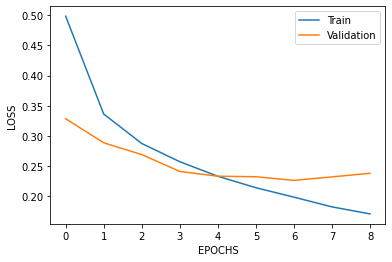

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend(['Train', 'Validation'])
plt.show()

In [20]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2261 - accuracy: 0.9165


[0.22605952620506287, 0.9164999723434448]

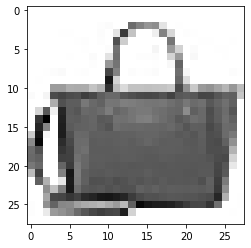

In [21]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap= 'gray_r')
plt.show()

In [26]:
preds= model.predict(val_scaled[0:1])
print(preds)
#preds = preds.argmax()
#print(preds)

[[1.0820759e-13 2.2459277e-18 2.9805538e-16 9.6944033e-16 1.6645461e-14
  4.8242423e-16 7.8486454e-15 3.7573426e-14 1.0000000e+00 2.5546236e-14]]


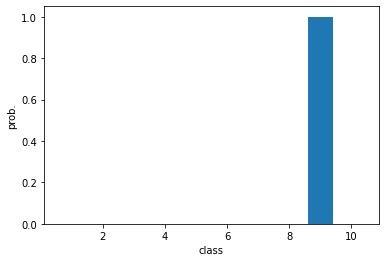

In [27]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [29]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '티셔츠', '앵클부츠']

In [30]:
import numpy as np

print(classes[np.argmax(preds)])

가방


In [31]:
# model 일반화 검증

test_scaled= test_input.reshape(-1, 28, 28, 1) / 255.0

In [32]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.2424 - accuracy: 0.9108


[0.24238742887973785, 0.9107999801635742]